In [1]:
import argparse
import numpy as np
import cv2
from sklearn import cluster
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

In [2]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description="Compress the image using clustering")
    parser.add_argument('--input-file',dest='input_file',required=True,help='Input image')
    parser.add_argument('--num-bits',dest="num_bits",required=False,type=int,help='Number of bits used to represent each pixel')
    return parser

In [3]:
def compress_image(image,num_clusters):
    x = image.reshape((-1,1))
    print(x)
    kmeans = cluster.KMeans(n_clusters=num_clusters,n_init=4,random_state=5)
    kmeans.fit(x)
    centroids = kmeans.cluster_centers_.squeeze()
    labels = kmeans.labels_
    
    input_image_compressed = np.choose(labels,centroids).reshape(image.shape)
    print(kmeans.cluster_centers_)
    return input_image_compressed

In [4]:
def plot_image(image, title):
    vmin = image.min()
    vmax = image.max()
    plt.figure()
    plt.title(title)
    print(vmin)
    plt.imshow(image,cmap=plt.cm.gray,vmin=vmin,vmax=vmax)

0


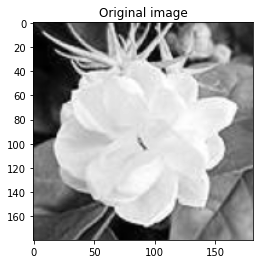

In [5]:
input_file = "E://tensorflow/jupyter/machine_learing_damo/4.data/hua.png"
input_image = cv2.imread(input_file).astype(np.uint8) 
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
input_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
plot_image(input_image, 'Original image') 



The size of the image will be reduced by a factor of 8.0

Compression rate = 87.5%
[[ 31]
 [ 32]
 [ 34]
 [ 38]
 [ 38]
 [ 35]
 [ 30]
 [ 30]
 [ 29]
 [ 25]
 [ 17]
 [  9]
 [ 14]
 [ 22]
 [ 29]
 [ 31]
 [ 25]
 [ 16]
 [  8]
 [  8]
 [ 10]
 [ 12]
 [ 12]
 [ 11]
 [ 17]
 [ 21]
 [ 34]
 [ 78]
 [117]
 [141]
 [100]
 [ 92]
 [101]
 [109]
 [108]
 [102]
 [ 94]
 [ 89]
 [ 85]
 [ 79]
 [ 75]
 [ 72]
 [ 72]
 [ 72]
 [ 71]
 [ 63]
 [ 55]
 [ 47]
 [ 47]
 [ 45]
 [ 43]
 [ 40]
 [ 39]
 [ 39]
 [ 41]
 [ 42]
 [ 42]
 [ 39]
 [ 37]
 [ 35]
 [ 34]
 [ 72]
 [138]
 [195]
 [220]
 [216]
 [113]
 [ 46]
 [ 11]
 [ 30]
 [ 33]
 [ 23]
 [ 26]
 [ 29]
 [ 33]
 [ 40]
 [ 45]
 [ 46]
 [ 22]
 [ 32]
 [ 74]
 [174]
 [196]
 [145]
 [ 79]
 [ 97]
 [191]
 [187]
 [127]
 [ 13]
 [  8]
 [ 11]
 [ 23]
 [ 10]
 [ 45]
 [129]
 [160]
 [121]
 [  5]
 [ 20]
 [ 26]
 [ 20]
 [ 87]
 [157]
 [228]
 [ 94]
 [ 16]
 [ 14]
 [ 12]
 [ 13]
 [ 21]
 [ 40]
 [102]
 [218]
 [234]
 [192]
 [ 81]
 [ 54]
 [ 48]
 [ 58]
 [ 42]
 [ 27]
 [ 16]
 [ 13]
 [ 16]
 [ 26]
 [ 46]
 [ 70]
 [ 99]
 [113]
 [117]

[[214.63279133]
 [ 74.3432066 ]]
74.34320660182748


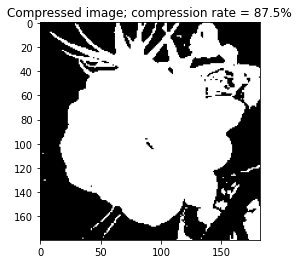

In [6]:
num_bits = 1
num_clusters = np.power(2,num_bits)
compression_rate = round(100 * (8.0 - num_bits) / 8.0, 2)
print("\nThe size of the image will be reduced by a factor of", 8.0/num_bits)
print("\nCompression rate = " + str(compression_rate) + "%")
input_image_compressed = compress_image(input_image, num_clusters)
plot_image(input_image_compressed, 'Compressed image; compression rate = ' + str(compression_rate) + '%')